In [185]:
import pandas as pd
import numpy as np 
import scipy.stats as stats
from scipy.stats import ranksums
import seaborn as sns

Null Hypothesis (H0): The median alcohol content of wines with a higher quality rating is not significantly different from the median alcohol content of wines with a lower quality rating.

Alternative Hypothesis (Ha): The median alcohol content of wines with a higher quality rating is significantly higher than the median alcohol content of wines with a lower quality rating.


In [186]:
df_red = pd.read_csv('winequality-red.csv',sep =';')
df_red.head(10)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
5,7.4,0.66,0.00,1.8,0.075,13.0,40.0,0.9978,3.51,0.56,9.4,5
6,7.9,0.60,0.06,1.6,0.069,15.0,59.0,0.9964,3.30,0.46,9.4,5
7,7.3,0.65,0.00,1.2,0.065,15.0,21.0,0.9946,3.39,0.47,10.0,7
8,7.8,0.58,0.02,2.0,0.073,9.0,18.0,0.9968,3.36,0.57,9.5,7
9,7.5,0.50,0.36,6.1,0.071,17.0,102.0,0.9978,3.35,0.80,10.5,5


In [187]:
df_red.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


In [188]:
df_red.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


In [189]:
df_red.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

In [190]:
df_new = df_red[['alcohol','quality']]
df_new


,alcohol,quality
0,9.4,5
1,9.8,5
2,9.8,5
3,9.8,6
4,9.4,5
...,...,...
1594,10.5,5
1595,11.2,6
1596,11.0,6
1597,10.2,5


In [191]:
high_quality = df_new[df_new['quality'] >= 7]
high_quality

,alcohol,quality
7,10.00,7
8,9.50,7
16,10.50,7
37,9.70,7
62,9.50,7
...,...,...
1541,10.90,7
1544,11.20,7
1549,11.40,8
1555,10.55,7


In [192]:
low_quality = df_new[df_new['quality'] < 7]
low_quality

,alcohol,quality
0,9.4,5
1,9.8,5
2,9.8,5
3,9.8,6
4,9.4,5
...,...,...
1594,10.5,5
1595,11.2,6
1596,11.0,6
1597,10.2,5


In [193]:
# duplicate rows in the red wine dataset
df_new.duplicated().sum()

1409

In [194]:
df_red['quality'].nunique()

6

In [195]:
df_red['alcohol'].median()

10.2

In [196]:
# alcohol content less than the median
low_alcohol = df_new.query('alcohol < 10.3')

# alcohol content greater than or equal to the median
high_alcohol = df_new.query('alcohol >= 10.3')

# ensure these query included each sample exactly once
num_samples = df_red.shape[0]
num_samples == low_alcohol['quality'].count() + high_alcohol['quality'].count() # should be True


True

In [197]:
low_alcohol['quality'].mean()


5.324228028503563

In [198]:
high_alcohol['quality'].mean()

5.982826948480845

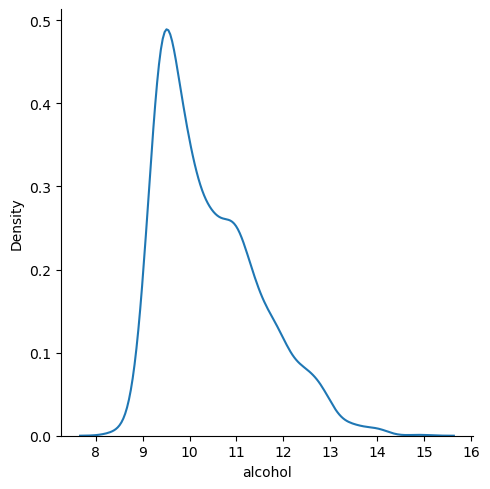

In [199]:
# Alcohol
alcohol = df_new[df_new['alcohol'].notna()].alcohol

sns.displot(alcohol, kind="kde");


claim that Wines with a higher quality rating have a higher median alcohol content than wines with a lower quality rating.

Ho:𝜇 <= 10.2
Ha:𝜇 > 10.2




In [200]:
stat, p_value = ranksums(high_alcohol, low_alcohol)
print(stat)

[34.57041727 15.84499605]


In [201]:
print(p_value)

[7.03427543e-262 1.52230567e-056]


In [203]:
alpha = 0.05
if p_value.all() < alpha:
    print('Reject the null hypothesis')
else:
    print('Fail to reject the null hypothesis')

Fail to reject the null hypothesis
